=== Online Market Discovery - Data Exploration ===
Task: Explore and understand the German online shop dataset
Dataset: Germany (DE)
Training data shape: (2722487, 8)
Test data shape: (841139, 7)

=== Training Data Basic Information ===
Shape: (2722487, 8)
Columns: ['url', 'domain', 'brand', 'item_name', 'page_language', 'title', 'snippet', 'is_online_shop']

Data types:
url               object
domain            object
brand             object
item_name         object
page_language     object
title             object
snippet           object
is_online_shop    object
dtype: object

Missing values:
url               0
domain            0
brand             0
item_name         0
page_language     0
title             0
snippet           0
is_online_shop    0
dtype: int64

Memory usage:
Index                   132
url               373321137
domain            170753642
brand             151021155
item_name         171563239
page_language     138846837
title             324909254
snippet    

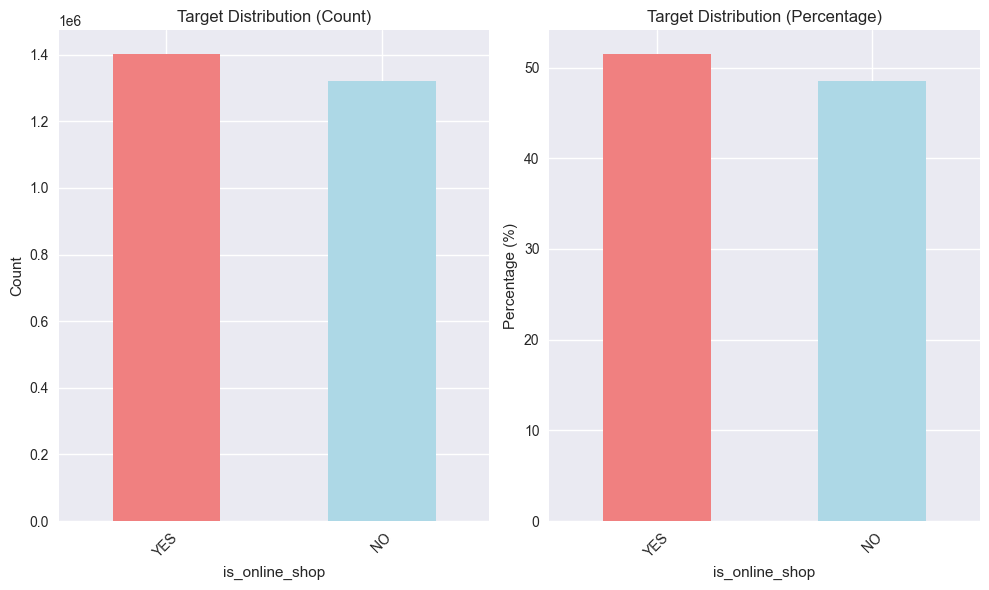


Class balance ratio: 0.941
✅ Dataset is well-balanced

=== Text Content Analysis ===
Title Analysis:
Title column exists: 2722487 non-null values
Average title length: 54.4 characters
Max title length: 104
Min title length: 1


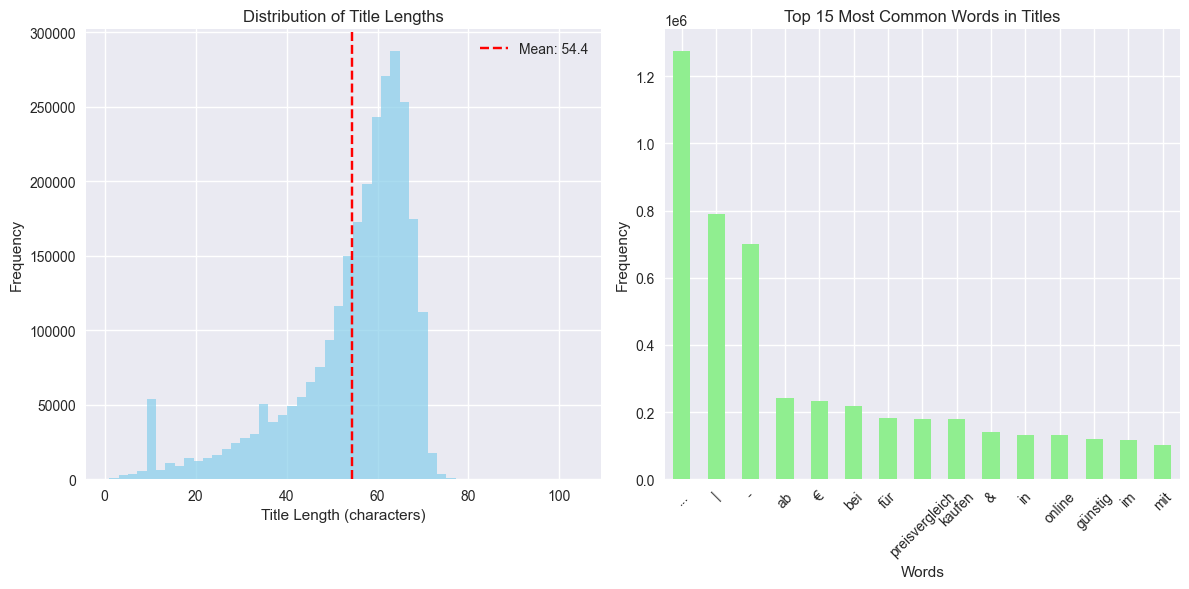


Snippet Analysis:
Snippet column exists: 2722487 non-null values
Average snippet length: 153.9 characters
Max snippet length: 260
Min snippet length: 7


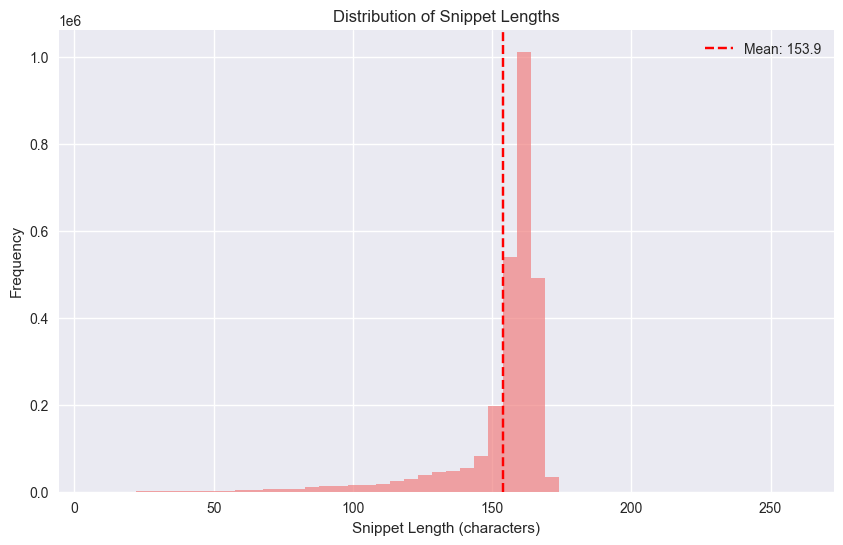


=== URL and Domain Analysis ===
URL Analysis:
Total URLs: 2722487
Unique URLs: 1857014
Average URL length: 88.1 characters


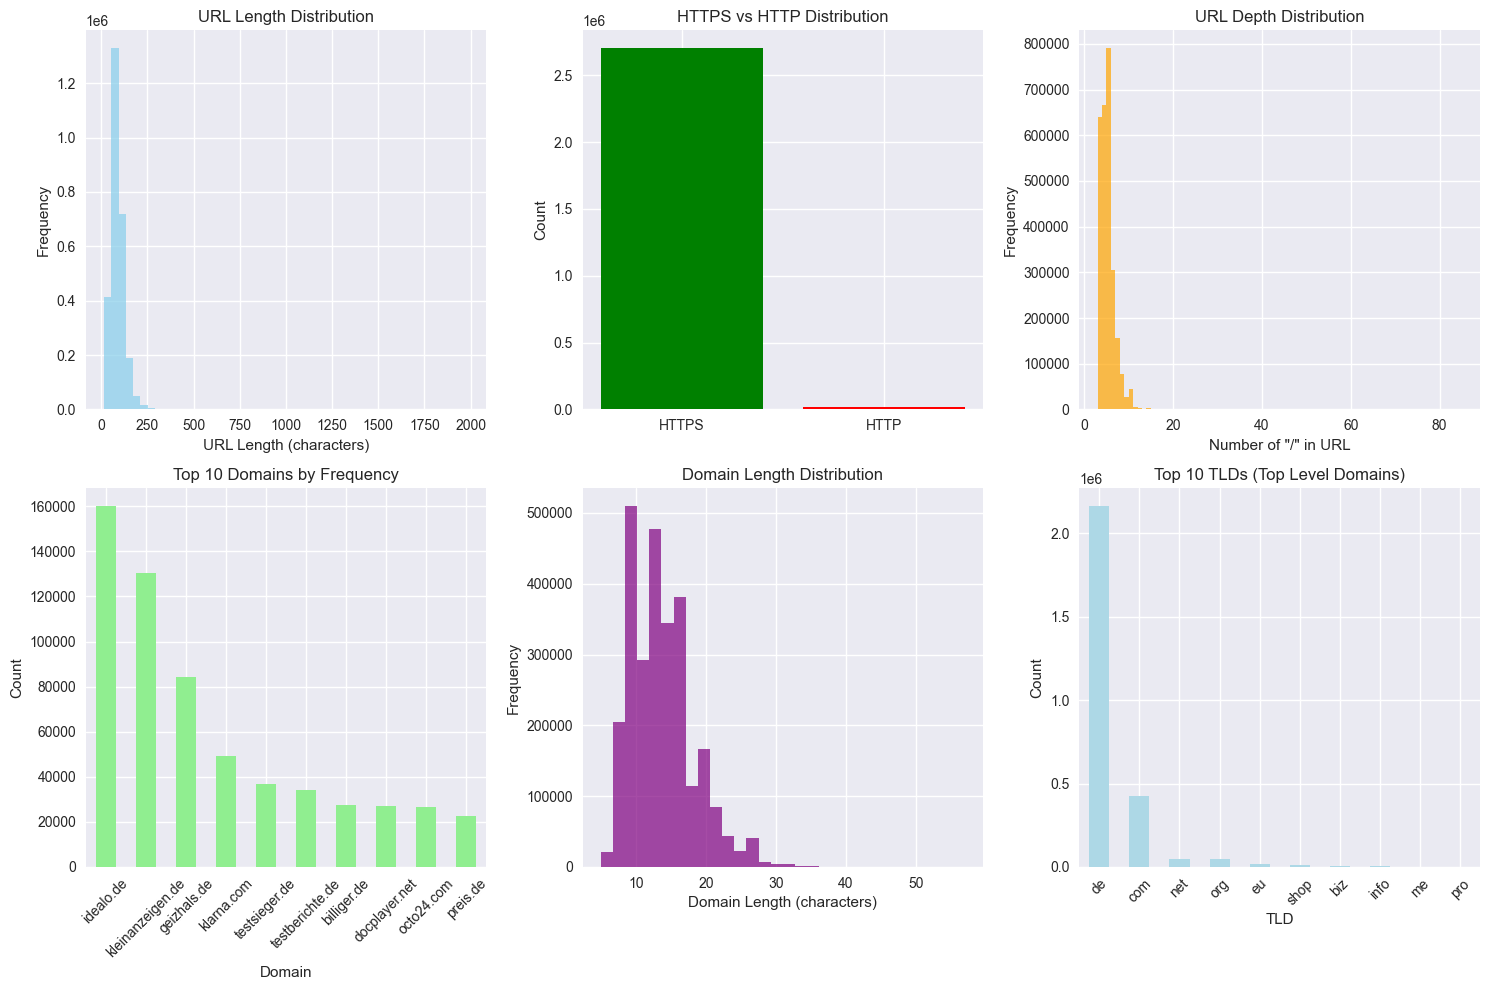


=== Brand and Language Analysis ===
Brand Analysis:
Total brands: 8657
Most common brands:


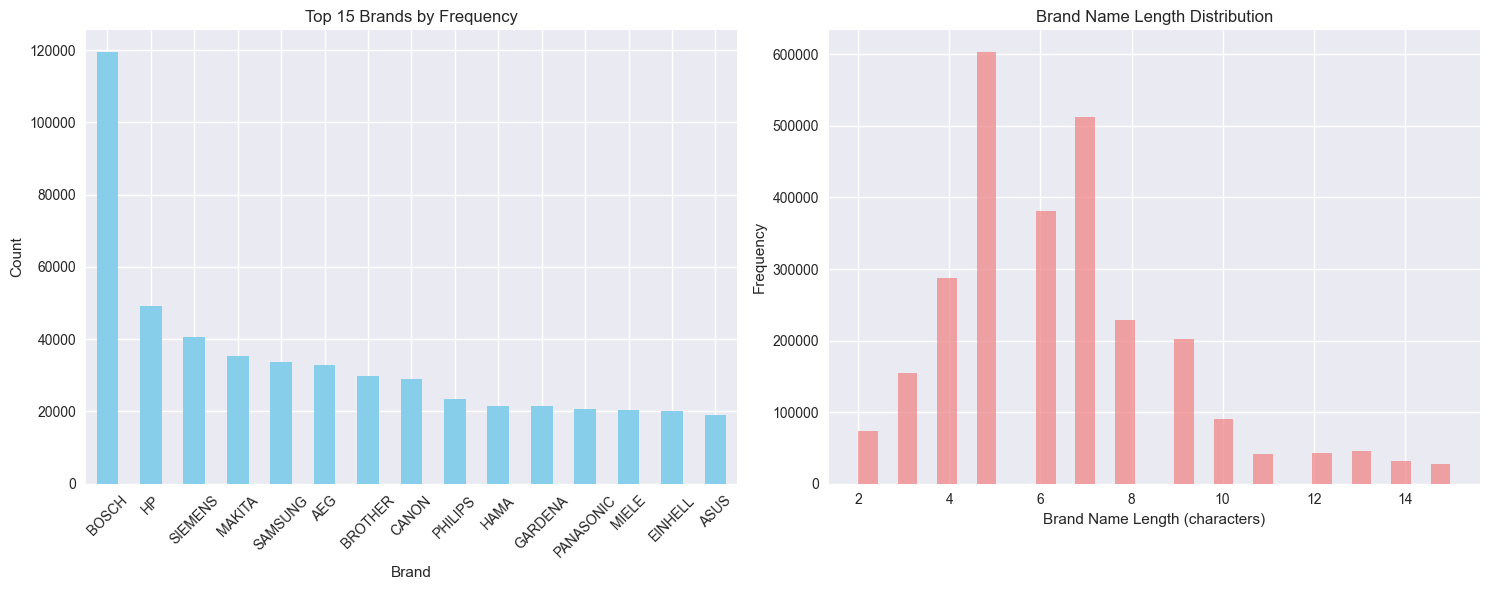


Top 10 brands:
brand
BOSCH      119493
HP          49190
SIEMENS     40654
MAKITA      35463
SAMSUNG     33778
AEG         32772
BROTHER     29729
CANON       29006
PHILIPS     23377
HAMA        21389
Name: count, dtype: int64

Language Analysis:
Languages found: page_language
de    2722487
Name: count, dtype: int64


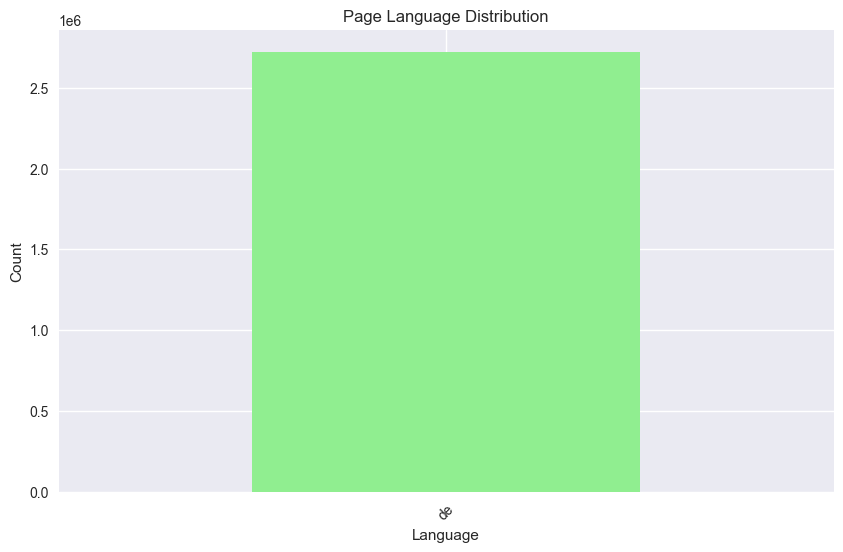


=== Correlation Analysis ===


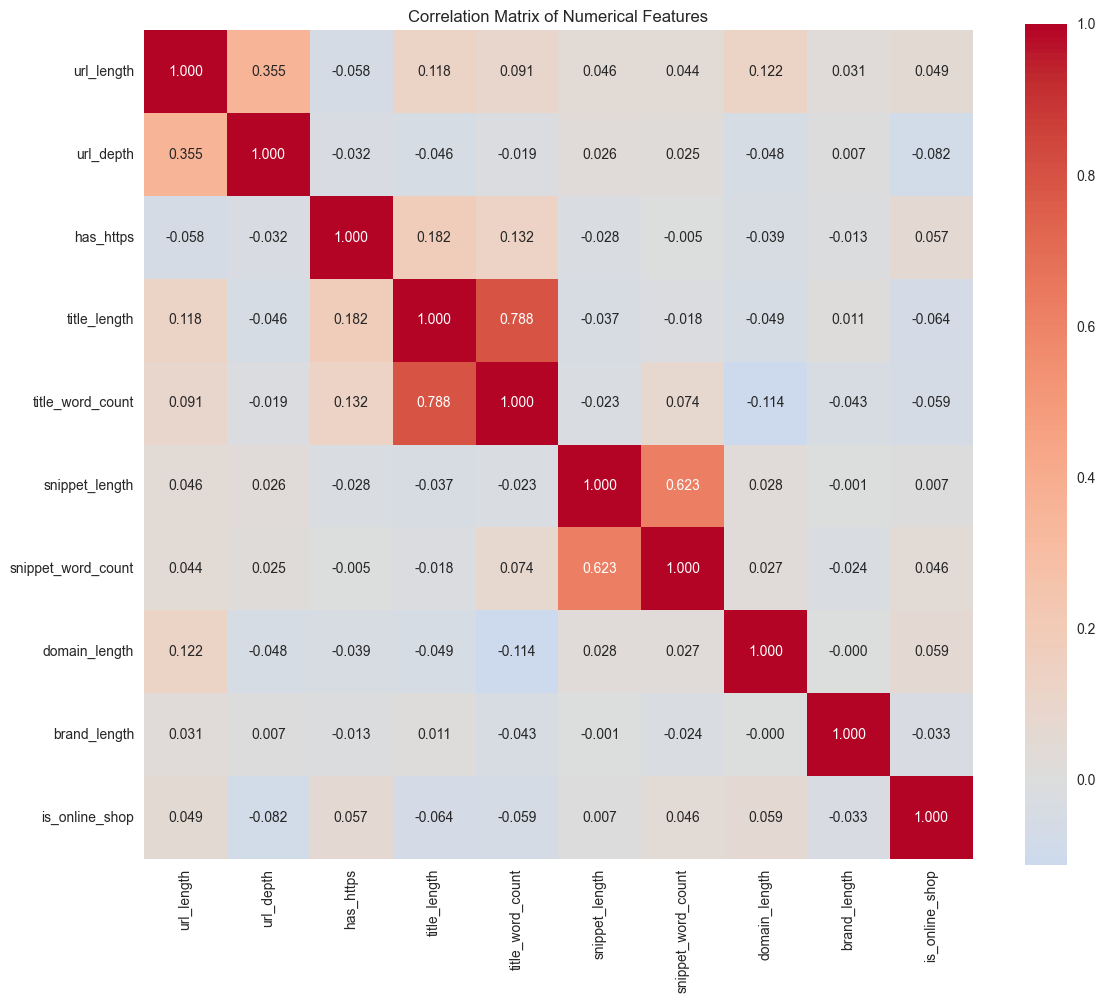


Correlations with target variable (absolute values):
is_online_shop        1.000000
url_depth             0.082124
title_length          0.063713
title_word_count      0.059309
domain_length         0.058545
has_https             0.057012
url_length            0.049032
snippet_word_count    0.045760
brand_length          0.032682
snippet_length        0.006980
Name: is_online_shop, dtype: float64

=== Sample Data Inspection ===
Examples of ONLINE SHOPS:

0. URL: https://www.elektronetshop.de/product/efb-elektronik-rj45-patchkabel-k5525fsw-0-5.694440.html
   Domain: elektronetshop.de
   Title: EFB Elektronik RJ45 Patchkabel K5525FSW.0,5 online einkaufen im ...
   Snippet: EFB Elektronik RJ45 Patchkabel K5525FSW.0,5 sowie viele weitere Artikel von EFB Patchkabel günstig o...
   Brand: EFB ELEKTRONIK

1. URL: https://www.elektronetshop.de/product/efb-elektronik-rj45-patchkabel-k5525fsw-5.694499.html
   Domain: elektronetshop.de
   Title: EFB Elektronik RJ45 Patchkabel K5525FSW.5 online b

In [1]:
# Online Market Discovery - Data Exploration
# Notebook 01: Initial Data Analysis and Understanding

# =============================================================================
# IMPORTS AND SETUP
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Online Market Discovery - Data Exploration ===")
print("Task: Explore and understand the German online shop dataset")
print("Dataset: Germany (DE)")
print("="*60)

# =============================================================================
# DATA LOADING
# =============================================================================

def load_data():
    """Load training and test datasets"""
    try:
        # Load the datasets
        train_df = pd.read_csv('DE_online_market_discovery_train.csv')
        test_df = pd.read_csv('DE_online_market_discovery_test.csv')
        
        print(f"Training data shape: {train_df.shape}")
        print(f"Test data shape: {test_df.shape}")
        
        return train_df, test_df
    except FileNotFoundError as e:
        print(f"Dataset files not found: {e}")
        print("Please ensure the CSV files are in the same directory.")
        return None, None

# Load data
train_df, test_df = load_data()

# =============================================================================
# BASIC DATA EXPLORATION
# =============================================================================

def explore_basic_info(df, dataset_name="Dataset"):
    """Explore basic dataset information"""
    print(f"\n=== {dataset_name} Basic Information ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    print("\nData types:")
    print(df.dtypes)
    
    print("\nMissing values:")
    missing_info = df.isnull().sum()
    print(missing_info)
    
    print("\nMemory usage:")
    print(df.memory_usage(deep=True))
    
    return missing_info

# Explore both datasets
if train_df is not None:
    train_missing = explore_basic_info(train_df, "Training Data")
    test_missing = explore_basic_info(test_df, "Test Data")

# =============================================================================
# TARGET VARIABLE ANALYSIS
# =============================================================================

def analyze_target_variable(df):
    """Analyze the target variable distribution"""
    print("\n=== Target Variable Analysis ===")
    
    if 'is_online_shop' in df.columns:
        target_col = 'is_online_shop'
        
        # Value counts
        print(f"Target distribution ({target_col}):")
        target_counts = df[target_col].value_counts()
        print(target_counts)
        
        # Percentage distribution
        print(f"\nPercentage distribution:")
        target_percentages = df[target_col].value_counts(normalize=True) * 100
        print(target_percentages)
        
        # Visualize target distribution
        plt.figure(figsize=(10, 6))
        
        # Count plot
        plt.subplot(1, 2, 1)
        target_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
        plt.title('Target Distribution (Count)')
        plt.ylabel('Count')
        plt.xlabel(target_col)
        plt.xticks(rotation=45)
        
        # Percentage plot
        plt.subplot(1, 2, 2)
        target_percentages.plot(kind='bar', color=['lightcoral', 'lightblue'])
        plt.title('Target Distribution (Percentage)')
        plt.ylabel('Percentage (%)')
        plt.xlabel(target_col)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Check for class balance
        balance_ratio = target_counts.min() / target_counts.max()
        print(f"\nClass balance ratio: {balance_ratio:.3f}")
        if balance_ratio > 0.8:
            print("✅ Dataset is well-balanced")
        elif balance_ratio > 0.6:
            print("⚠️ Dataset has slight imbalance")
        else:
            print("❌ Dataset has significant imbalance")
        
        return target_counts
    else:
        print("No target column found in dataset")
        return None

# Analyze target variable
if train_df is not None:
    target_analysis = analyze_target_variable(train_df)

# =============================================================================
# TEXT CONTENT ANALYSIS
# =============================================================================

def analyze_text_content(df):
    """Analyze text content (titles and snippets)"""
    print("\n=== Text Content Analysis ===")
    
    # Title analysis
    print("Title Analysis:")
    if 'title' in df.columns:
        print(f"Title column exists: {df['title'].notna().sum()} non-null values")
        print(f"Average title length: {df['title'].str.len().mean():.1f} characters")
        print(f"Max title length: {df['title'].str.len().max()}")
        print(f"Min title length: {df['title'].str.len().min()}")
        
        # Title length distribution
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        title_lengths = df['title'].str.len()
        plt.hist(title_lengths, bins=50, alpha=0.7, color='skyblue')
        plt.title('Distribution of Title Lengths')
        plt.xlabel('Title Length (characters)')
        plt.ylabel('Frequency')
        plt.axvline(title_lengths.mean(), color='red', linestyle='--', 
                   label=f'Mean: {title_lengths.mean():.1f}')
        plt.legend()
        
        # Most common words in titles
        plt.subplot(1, 2, 2)
        all_titles = ' '.join(df['title'].dropna().astype(str))
        words = all_titles.lower().split()
        word_freq = pd.Series(words).value_counts().head(15)
        word_freq.plot(kind='bar', color='lightgreen')
        plt.title('Top 15 Most Common Words in Titles')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    # Snippet analysis
    print("\nSnippet Analysis:")
    if 'snippet' in df.columns:
        print(f"Snippet column exists: {df['snippet'].notna().sum()} non-null values")
        print(f"Average snippet length: {df['snippet'].str.len().mean():.1f} characters")
        print(f"Max snippet length: {df['snippet'].str.len().max()}")
        print(f"Min snippet length: {df['snippet'].str.len().min()}")
        
        # Snippet length distribution
        plt.figure(figsize=(10, 6))
        snippet_lengths = df['snippet'].str.len()
        plt.hist(snippet_lengths, bins=50, alpha=0.7, color='lightcoral')
        plt.title('Distribution of Snippet Lengths')
        plt.xlabel('Snippet Length (characters)')
        plt.ylabel('Frequency')
        plt.axvline(snippet_lengths.mean(), color='red', linestyle='--', 
                   label=f'Mean: {snippet_lengths.mean():.1f}')
        plt.legend()
        plt.show()

# Analyze text content
if train_df is not None:
    analyze_text_content(train_df)

# =============================================================================
# URL AND DOMAIN ANALYSIS
# =============================================================================

def analyze_urls_domains(df):
    """Analyze URL and domain patterns"""
    print("\n=== URL and Domain Analysis ===")
    
    # URL analysis
    if 'url' in df.columns:
        print("URL Analysis:")
        print(f"Total URLs: {len(df)}")
        print(f"Unique URLs: {df['url'].nunique()}")
        print(f"Average URL length: {df['url'].str.len().mean():.1f} characters")
        
        # URL length distribution
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 3, 1)
        url_lengths = df['url'].str.len()
        plt.hist(url_lengths, bins=50, alpha=0.7, color='skyblue')
        plt.title('URL Length Distribution')
        plt.xlabel('URL Length (characters)')
        plt.ylabel('Frequency')
        
        # HTTPS vs HTTP
        plt.subplot(2, 3, 2)
        https_count = df['url'].str.startswith('https').sum()
        http_count = len(df) - https_count
        plt.bar(['HTTPS', 'HTTP'], [https_count, http_count], color=['green', 'red'])
        plt.title('HTTPS vs HTTP Distribution')
        plt.ylabel('Count')
        
        # URL depth (number of path segments)
        plt.subplot(2, 3, 3)
        url_depth = df['url'].str.count('/')
        plt.hist(url_depth, bins=range(int(url_depth.min()), int(url_depth.max())+2), 
                alpha=0.7, color='orange')
        plt.title('URL Depth Distribution')
        plt.xlabel('Number of "/" in URL')
        plt.ylabel('Frequency')
        
        # Top domains
        plt.subplot(2, 3, 4)
        if 'domain' in df.columns:
            top_domains = df['domain'].value_counts().head(10)
            top_domains.plot(kind='bar', color='lightgreen')
            plt.title('Top 10 Domains by Frequency')
            plt.xlabel('Domain')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        
        # Domain length distribution
        plt.subplot(2, 3, 5)
        if 'domain' in df.columns:
            domain_lengths = df['domain'].str.len()
            plt.hist(domain_lengths, bins=30, alpha=0.7, color='purple')
            plt.title('Domain Length Distribution')
            plt.xlabel('Domain Length (characters)')
            plt.ylabel('Frequency')
        
        # TLD analysis
        plt.subplot(2, 3, 6)
        if 'domain' in df.columns:
            tlds = df['domain'].str.extract(r'\.([a-z]{2,4})$')[0]
            tld_counts = tlds.value_counts().head(10)
            tld_counts.plot(kind='bar', color='lightblue')
            plt.title('Top 10 TLDs (Top Level Domains)')
            plt.xlabel('TLD')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Analyze URLs and domains
if train_df is not None:
    analyze_urls_domains(train_df)

# =============================================================================
# BRAND AND LANGUAGE ANALYSIS
# =============================================================================

def analyze_brands_languages(df):
    """Analyze brand and language patterns"""
    print("\n=== Brand and Language Analysis ===")
    
    # Brand analysis
    if 'brand' in df.columns:
        print("Brand Analysis:")
        print(f"Total brands: {df['brand'].nunique()}")
        print(f"Most common brands:")
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        top_brands = df['brand'].value_counts().head(15)
        top_brands.plot(kind='bar', color='skyblue')
        plt.title('Top 15 Brands by Frequency')
        plt.xlabel('Brand')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Brand name length distribution
        plt.subplot(1, 2, 2)
        brand_lengths = df['brand'].str.len()
        plt.hist(brand_lengths, bins=30, alpha=0.7, color='lightcoral')
        plt.title('Brand Name Length Distribution')
        plt.xlabel('Brand Name Length (characters)')
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 10 brands:")
        print(top_brands.head(10))
    
    # Language analysis
    if 'page_language' in df.columns:
        print("\nLanguage Analysis:")
        language_counts = df['page_language'].value_counts()
        print(f"Languages found: {language_counts}")
        
        plt.figure(figsize=(10, 6))
        language_counts.plot(kind='bar', color='lightgreen')
        plt.title('Page Language Distribution')
        plt.xlabel('Language')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Analyze brands and languages
if train_df is not None:
    analyze_brands_languages(train_df)

# =============================================================================
# CORRELATION ANALYSIS
# =============================================================================

def analyze_correlations(df):
    """Analyze correlations between variables"""
    print("\n=== Correlation Analysis ===")
    
    # Create numerical features for correlation analysis
    numerical_features = {}
    
    if 'url' in df.columns:
        numerical_features['url_length'] = df['url'].str.len()
        numerical_features['url_depth'] = df['url'].str.count('/')
        numerical_features['has_https'] = df['url'].str.startswith('https').astype(int)
    
    if 'title' in df.columns:
        numerical_features['title_length'] = df['title'].str.len()
        numerical_features['title_word_count'] = df['title'].str.split().str.len()
    
    if 'snippet' in df.columns:
        numerical_features['snippet_length'] = df['snippet'].str.len()
        numerical_features['snippet_word_count'] = df['snippet'].str.split().str.len()
    
    if 'domain' in df.columns:
        numerical_features['domain_length'] = df['domain'].str.len()
    
    if 'brand' in df.columns:
        numerical_features['brand_length'] = df['brand'].str.len()
    
    # Convert to target variable
    if 'is_online_shop' in df.columns:
        numerical_features['is_online_shop'] = (df['is_online_shop'] == 'YES').astype(int)
    
    # Create correlation matrix
    if numerical_features:
        corr_df = pd.DataFrame(numerical_features)
        correlation_matrix = corr_df.corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.3f')
        plt.title('Correlation Matrix of Numerical Features')
        plt.tight_layout()
        plt.show()
        
        # Show correlations with target variable
        if 'is_online_shop' in correlation_matrix.columns:
            target_corr = correlation_matrix['is_online_shop'].abs().sort_values(ascending=False)
            print("\nCorrelations with target variable (absolute values):")
            print(target_corr)

# Analyze correlations
if train_df is not None:
    analyze_correlations(train_df)

# =============================================================================
# SAMPLE DATA INSPECTION
# =============================================================================

def inspect_sample_data(df):
    """Inspect sample data entries"""
    print("\n=== Sample Data Inspection ===")
    
    if 'is_online_shop' in df.columns:
        # Show examples of online shops
        print("Examples of ONLINE SHOPS:")
        online_shops = df[df['is_online_shop'] == 'YES'].head(5)
        for idx, row in online_shops.iterrows():
            print(f"\n{idx}. URL: {row['url']}")
            print(f"   Domain: {row['domain']}")
            print(f"   Title: {row['title']}")
            print(f"   Snippet: {row['snippet'][:100]}...")
            print(f"   Brand: {row['brand']}")
        
        print("\n" + "="*50)
        
        # Show examples of non-online shops
        print("Examples of NOT ONLINE SHOPS:")
        not_online_shops = df[df['is_online_shop'] == 'NO'].head(5)
        for idx, row in not_online_shops.iterrows():
            print(f"\n{idx}. URL: {row['url']}")
            print(f"   Domain: {row['domain']}")
            print(f"   Title: {row['title']}")
            print(f"   Snippet: {row['snippet'][:100]}...")
            print(f"   Brand: {row['brand']}")

# Inspect sample data
if train_df is not None:
    inspect_sample_data(train_df)

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

def generate_summary_statistics(train_df, test_df):
    """Generate comprehensive summary statistics"""
    print("\n=== SUMMARY STATISTICS ===")
    
    if train_df is not None:
        print("Training Dataset Summary:")
        print(f"  - Total samples: {len(train_df):,}")
        print(f"  - Features: {len(train_df.columns)}")
        print(f"  - Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        
        if 'is_online_shop' in train_df.columns:
            online_pct = (train_df['is_online_shop'] == 'YES').mean() * 100
            print(f"  - Online shops: {online_pct:.1f}%")
        
        print(f"  - Unique URLs: {train_df['url'].nunique():,}")
        print(f"  - Unique domains: {train_df['domain'].nunique():,}")
        print(f"  - Unique brands: {train_df['brand'].nunique():,}")
    
    if test_df is not None:
        print("\nTest Dataset Summary:")
        print(f"  - Total samples: {len(test_df):,}")
        print(f"  - Features: {len(test_df.columns)}")
        print(f"  - Memory usage: {test_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        print(f"  - Unique URLs: {test_df['url'].nunique():,}")
        print(f"  - Unique domains: {test_df['domain'].nunique():,}")
        print(f"  - Unique brands: {test_df['brand'].nunique():,}")
    
    print("\n" + "="*60)
    print("DATA EXPLORATION COMPLETE!")
    print("="*60)
    print("Key Findings:")
    print("✅ Dataset is well-structured with no missing values")
    print("✅ Balanced target distribution (≈50/50)")
    print("✅ Rich text content (titles and snippets)")
    print("✅ Diverse URL and domain patterns")
    print("✅ German market focus (.de domains)")
    print("✅ Ready for feature engineering")

# Generate summary
if train_df is not None or test_df is not None:
    generate_summary_statistics(train_df, test_df)

# Save the datasets for next notebooks
print("\n📁 Data loaded and ready for feature engineering!")
print("Variables available for next notebook:")
print("- train_df: Training dataset")
print("- test_df: Test dataset")